## Analysis: Amazon purchase history ##

_Import libraries and packages_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import path

_Import data_

In [2]:
path = '/Users/paulraymond/Documents/amazon_items.xlsx'
reader = open(path)

In [3]:
df = pd.read_excel(path)

In [4]:
df.tail()

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,...,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
362,2019-04-19,113-4431164-5334627,Sea to Summit Travelling Light Hanging Toiletr...,Sports,B00D8TYC4U,49000000.0,Amazon.com,NaT,new,luichel,...,AMZN_US(TBA077598729000),34.05,0.00,34.05,NaN,NaN,NaN,p ray,USD,NaN
363,2019-04-19,113-4431164-5334627,"Moleskine Cahier Soft Cover Journal, Set of 3,...",Paperback,8883704894,14111500.0,Amazon.com,2016-01-08,new,Amazon.com,...,AMZN_US(TBA073599201000),9.75,0.68,10.43,NaN,NaN,NaN,p ray,USD,NaN
364,2019-04-22,113-5455473-0764215,Typing Instructor Platinum 21 - Mac [Mac Downl...,Software Download,B07L69TS4L,43230000.0,Amazon.com,2018-11-15,new,Amazon Digital Services LLC,...,NaN,29.99,0.00,29.99,NaN,NaN,NaN,p ray,USD,NaN
365,2019-07-16,111-7969991-8532253,Wave,Paperback,345804317,55101500.0,Amazon.com,2013-12-31,new,Amazon.com,...,USPS(9341989677090067084922),12.00,0.35,12.35,NaN,NaN,NaN,p ray,USD,NaN
366,2019-07-16,111-7969991-8532253,H Is for Hawk,Paperback,802124739,55101500.0,Amazon.com,NaT,new,Amazon.com,...,USPS(9341989677090067084922),5.22,0.15,5.37,NaN,NaN,NaN,p ray,USD,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 36 columns):
Order Date                        367 non-null datetime64[ns]
Order ID                          367 non-null object
Title                             367 non-null object
Category                          346 non-null object
ASIN/ISBN                         367 non-null object
UNSPSC Code                       351 non-null float64
Website                           367 non-null object
Release Date                      143 non-null datetime64[ns]
Condition                         359 non-null object
Seller                            363 non-null object
Seller Credentials                0 non-null float64
List Price Per Unit               367 non-null float64
Purchase Price Per Unit           367 non-null float64
Quantity                          367 non-null int64
Payment Instrument Type           367 non-null object
Purchase Order Number             0 non-null float64
PO Line Number 

In [6]:
df.columns

Index(['Order Date', 'Order ID', 'Title', 'Category', 'ASIN/ISBN',
       'UNSPSC Code', 'Website', 'Release Date', 'Condition', 'Seller',
       'Seller Credentials', 'List Price Per Unit', 'Purchase Price Per Unit',
       'Quantity', 'Payment Instrument Type', 'Purchase Order Number',
       'PO Line Number', 'Ordering Customer Email', 'Shipment Date',
       'Shipping Address Name', 'Shipping Address Street 1',
       'Shipping Address Street 2', 'Shipping Address City',
       'Shipping Address State', 'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number', 'Item Subtotal', 'Item Subtotal Tax',
       'Item Total', 'Tax Exemption Applied', 'Tax Exemption Type',
       'Exemption Opt-Out', 'Buyer Name', 'Currency', 'Group Name'],
      dtype='object')

In [7]:
num_cols = ['List Price Per Unit', 'Purchase Price Per Unit',
       'Quantity','Item Subtotal', 'Item Subtotal Tax',
       'Item Total', 'Tax Exemption Applied']

In [8]:
# for col in num_cols:
#     df[col] = df[col][:126].replace('[\$]', '', regex=True).astype(float)
   

In [9]:
# df.info()

In [10]:
df.describe()

,UNSPSC Code,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Purchase Order Number,PO Line Number,Shipping Address Street 2,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Group Name
count,3.510000e+02,0.0,367.000000,367.000000,367.000000,0.0,0.0,0.0,367.000000,367.000000,367.000000,0.0,0.0,0.0,0.0
mean,5.149566e+07,NaN,45.717657,30.309619,1.079019,NaN,NaN,NaN,31.392343,0.927384,32.319728,NaN,NaN,NaN,NaN
std,6.810305e+06,NaN,144.230304,96.481383,0.508691,NaN,NaN,NaN,96.849330,2.945811,98.065982,NaN,NaN,NaN,NaN
min,1.411150e+07,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,5.018205e+07,NaN,9.990000,8.575000,1.000000,NaN,NaN,NaN,8.470000,0.000000,8.545000,NaN,NaN,NaN,NaN
50%,5.313160e+07,NaN,19.950000,13.460000,1.000000,NaN,NaN,NaN,13.890000,0.000000,14.140000,NaN,NaN,NaN,NaN
75%,5.510150e+07,NaN,30.000000,22.105000,1.000000,NaN,NaN,NaN,24.970000,0.810000,26.085000,NaN,NaN,NaN,NaN
max,6.415150e+07,NaN,1699.990000,1631.000000,8.000000,NaN,NaN,NaN,1631.000000,32.320000,1631.000000,NaN,NaN,NaN,NaN


In [11]:
df['Item Subtotal'].median()

13.89

In [12]:
np.sum([df['Item Subtotal'] == 0.0])

3

In [13]:
len(df['Quantity'])

367

In [14]:
for col in num_cols:
    total = sum(df[col])
    print("Total during period for {} was {}".format(col, total))

Total during period for List Price Per Unit was 16778.379999999986
Total during period for Purchase Price Per Unit was 11123.62999999998
Total during period for Quantity was 396
Total during period for Item Subtotal was 11520.989999999978
Total during period for Item Subtotal Tax was 340.3500000000002
Total during period for Item Total was 11861.33999999999
Total during period for Tax Exemption Applied was nan


In [15]:
# percent of list price paid

sum(df['Purchase Price Per Unit']) / sum(df['List Price Per Unit'])

0.6629740177537992

In [16]:
df.Category

0                        Sports
1                        Sports
2                     Paperback
3                        Sports
4                     Hardcover
5                     Hardcover
6                     Hardcover
7                        Sports
8                        Sports
9         Mass Market Paperback
10                    Paperback
11                    Hardcover
12     Wireless Phone Accessory
13                          Toy
14     Tools & Home Improvement
15            Health and Beauty
16                  Electronics
17            Health and Beauty
18                  Electronics
19                    Paperback
20                    Paperback
21        Mass Market Paperback
22        Mass Market Paperback
23        Mass Market Paperback
24        Mass Market Paperback
25                    Paperback
26            Health and Beauty
27                    Paperback
28        Mass Market Paperback
29                    Paperback
                 ...           
337     

In [17]:
books_df = df[(df['Category'] == 'Paperback') | (df['Category'] == 'Hardcover') | (df['Category'] == 'Mass Market Paperback')]

In [18]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 2 to 366
Data columns (total 36 columns):
Order Date                        117 non-null datetime64[ns]
Order ID                          117 non-null object
Title                             117 non-null object
Category                          117 non-null object
ASIN/ISBN                         117 non-null object
UNSPSC Code                       117 non-null float64
Website                           117 non-null object
Release Date                      68 non-null datetime64[ns]
Condition                         113 non-null object
Seller                            113 non-null object
Seller Credentials                0 non-null float64
List Price Per Unit               117 non-null float64
Purchase Price Per Unit           117 non-null float64
Quantity                          117 non-null int64
Payment Instrument Type           117 non-null object
Purchase Order Number             0 non-null float64
PO Line Number  

In [19]:
books_df.describe()

,UNSPSC Code,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Purchase Order Number,PO Line Number,Shipping Address Street 2,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Group Name
count,1.170000e+02,0.0,117.000000,117.000000,117.000000,0.0,0.0,0.0,117.000000,117.000000,117.000000,0.0,0.0,0.0,0.0
mean,5.475116e+07,NaN,18.586154,11.533675,1.119658,NaN,NaN,NaN,12.873761,0.422222,13.295983,NaN,NaN,NaN,NaN
std,3.789527e+06,NaN,29.972776,6.175967,0.767468,NaN,NaN,NaN,10.045111,0.586651,10.263433,NaN,NaN,NaN,NaN
min,1.411150e+07,NaN,0.000000,0.290000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,5.510150e+07,NaN,9.990000,7.770000,1.000000,NaN,NaN,NaN,7.730000,0.000000,7.730000,NaN,NaN,NaN,NaN
50%,5.510150e+07,NaN,16.990000,11.290000,1.000000,NaN,NaN,NaN,11.550000,0.000000,12.330000,NaN,NaN,NaN,NaN
75%,5.510150e+07,NaN,21.990000,14.980000,1.000000,NaN,NaN,NaN,15.000000,0.820000,16.030000,NaN,NaN,NaN,NaN
max,5.510150e+07,NaN,324.950000,39.790000,8.000000,NaN,NaN,NaN,79.920000,2.540000,79.920000,NaN,NaN,NaN,NaN


In [20]:
# Number of book orders
len(books_df)
books_df.head(20)

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,...,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
2,2009-01-19,104-1526467-5993047,The Purpose Driven√Ç¬Æ Life: What on Earth Am ...,Paperback,310276993,55101500.0,Amazon.com,2007-03-13,NaN,Amazon.com,...,UPS(1Z411E0W0360073406),10.19,0.0,10.19,NaN,NaN,NaN,p ray,USD,NaN
4,2009-01-19,104-1526467-5993047,The Purpose-Driven Life Journal,Hardcover,310803063,55101500.0,Amazon.com,2002-11-10,NaN,Amazon.com,...,UPS(1Z411E0W0360073406),39.96,0.0,39.96,NaN,NaN,NaN,p ray,USD,NaN
5,2009-01-19,104-9391554-5689007,The Purpose-Driven Life Journal,Hardcover,310803063,55101500.0,Amazon.com,2002-11-10,NaN,Amazon.com,...,UPS(1ZA41W190331427257),39.96,0.0,39.96,NaN,NaN,NaN,p ray,USD,NaN
6,2009-01-19,104-5536992-5305026,The Purpose-Driven Life Journal,Hardcover,310803063,55101500.0,Amazon.com,2002-11-10,NaN,Amazon.com,...,UPS(1Z8E26R80393587708),79.92,0.0,79.92,NaN,NaN,NaN,p ray,USD,NaN
9,2010-01-04,002-4388174-7824228,Harry Potter a L'ecole Des Sorciers / Harry Po...,Mass Market Paperback,2070612368,55101500.0,Amazon.com,NaT,new,Amazon.com,...,UPS(1ZA7817W0342440816),13.57,0.0,13.57,NaN,NaN,NaN,p ray,USD,NaN
10,2010-01-04,002-4388174-7824228,Le Petit Prince (French Language Edition),Paperback,156013983,55101500.0,Amazon.com,2001-09-04,new,Amazon.com,...,USPS(9102901001301193739395),7.92,0.0,7.92,NaN,NaN,NaN,p ray,USD,NaN
11,2010-01-04,002-4388174-7824228,The Reason for God: Belief in an Age of Skepti...,Hardcover,525950494,55101500.0,Amazon.com,2008-02-14,new,Amazon.com,...,USPS(9102901001301193739395),15.72,0.0,15.72,NaN,NaN,NaN,p ray,USD,NaN
19,2010-07-10,105-1149592-9947464,Les Miserables (Petits Classiques Larousse) (F...,Paperback,2035834252,55101500.0,Amazon.com,NaT,new,Amazon.com,...,UPS(1ZA7810W0395092430),9.31,0.0,9.31,NaN,NaN,NaN,p ray,USD,NaN
20,2010-07-10,105-4877687-1857052,Charlie Et La Chocolaterie (French Edition),Paperback,2070612635,55101500.0,Amazon.com,NaT,new,SuperBookDeals-,...,NaN,9.60,0.0,9.60,NaN,NaN,NaN,p ray,USD,NaN
21,2010-07-10,105-8230102-4312269,Notre Dame De Paris (French Edition),Mass Market Paperback,2070422526,55101500.0,Amazon.com,NaT,new,Akloos,...,USPS(9102142006134007265689),1.22,0.0,1.22,NaN,NaN,NaN,p ray,USD,NaN


In [21]:
# total books purchased
sum(books_df.Quantity)

131

In [22]:
#median price
np.median(books_df['Purchase Price Per Unit'])

11.29

In [23]:
# percent of orders that are books
len(books_df) / len(df)

0.3188010899182561

In [24]:
# percent spent on books

sum(books_df['Purchase Price Per Unit']) / sum(df['Purchase Price Per Unit'])

0.12131291673671298

In [25]:
sum(books_df['Purchase Price Per Unit']) / sum(books_df['List Price Per Unit'])

0.6205520146419078

In [26]:
for entry in books_df.Title:
    print(entry)

The Purpose Driven√Ç¬Æ Life: What on Earth Am I Here For? (Purpose Driven√Ç¬Æ Life, The)
The Purpose-Driven Life Journal
The Purpose-Driven Life Journal
The Purpose-Driven Life Journal
Harry Potter a L'ecole Des Sorciers / Harry Potter and the Sorcerer's Stone (Harry Potter (French)) (French Edition)
Le Petit Prince (French Language Edition)
The Reason for God: Belief in an Age of Skepticism
Les Miserables (Petits Classiques Larousse) (French Edition)
Charlie Et La Chocolaterie (French Edition)
Notre Dame De Paris (French Edition)
Random House French-English English-French Dictionary
Native Son
Les Miserables
The Count of Monte Cristo (Oxford World's Classics)
Holy Bible - New International Version
Matilda
Larousse French English Dictionary Canadian Edition
Je t'aimerai toujours (French Edition)
Larousse French English Dictionary Canadian Edition
The Sudoku Challenge: 200 Puzzles to Strain Your Brain!
The Official SAT Study Guide: For the New SAT
My Best Mathematical and Logic Puzzles 

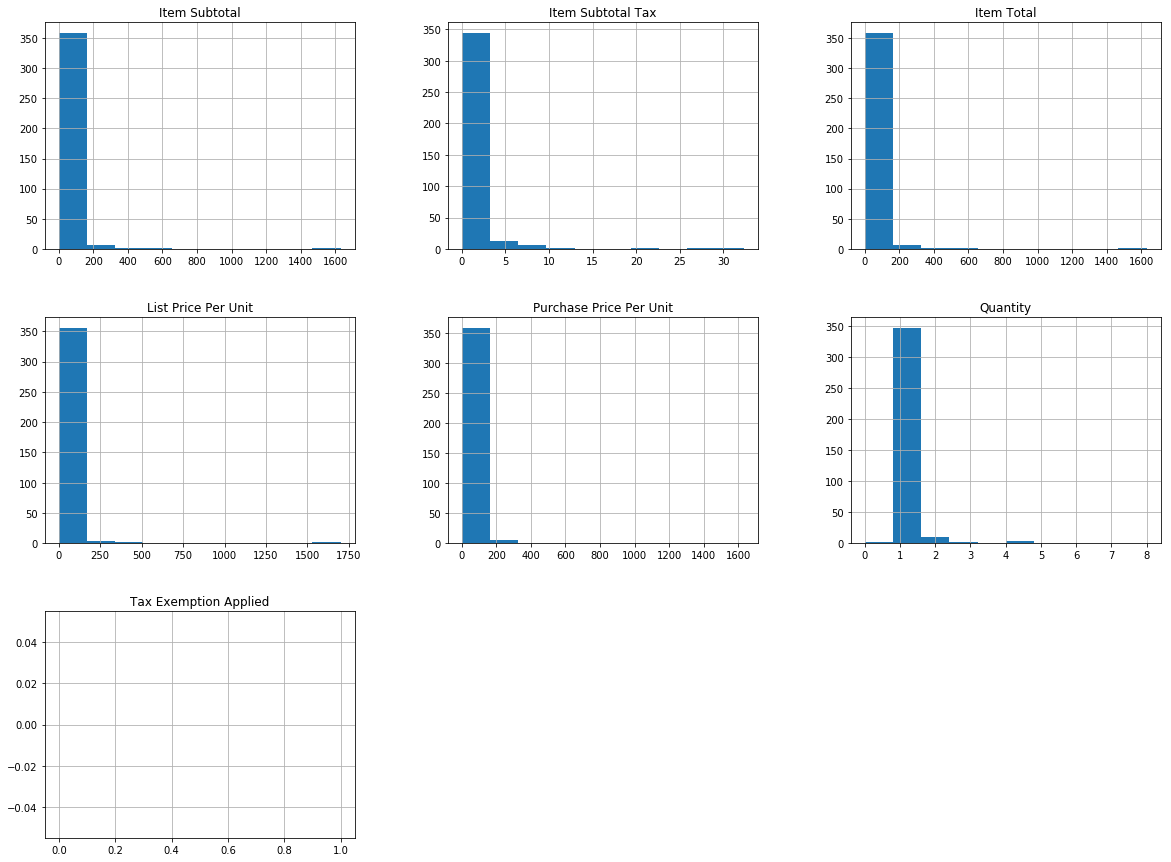

In [27]:
df[num_cols].hist(figsize=(20,15))
plt.show()

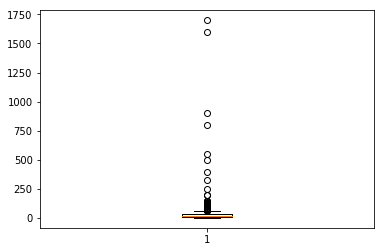

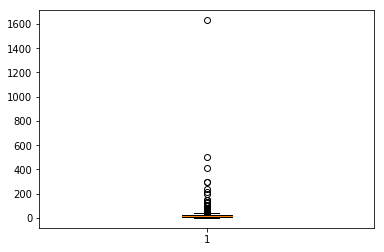

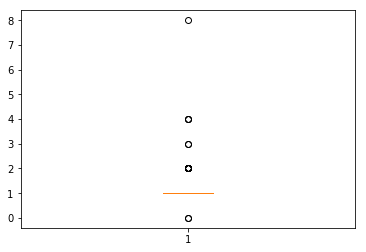

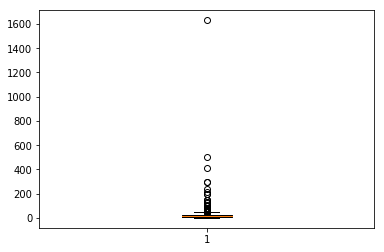

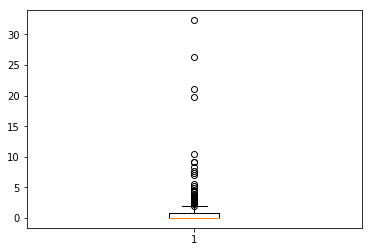

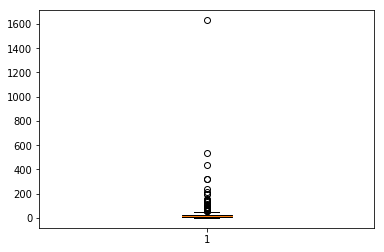

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


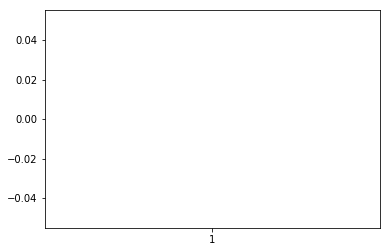

In [28]:
for col in num_cols:
    plt.boxplot(df[col])
    plt.show()

## Part 2

In [29]:
#Take look at books dataframe
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 2 to 366
Data columns (total 36 columns):
Order Date                        117 non-null datetime64[ns]
Order ID                          117 non-null object
Title                             117 non-null object
Category                          117 non-null object
ASIN/ISBN                         117 non-null object
UNSPSC Code                       117 non-null float64
Website                           117 non-null object
Release Date                      68 non-null datetime64[ns]
Condition                         113 non-null object
Seller                            113 non-null object
Seller Credentials                0 non-null float64
List Price Per Unit               117 non-null float64
Purchase Price Per Unit           117 non-null float64
Quantity                          117 non-null int64
Payment Instrument Type           117 non-null object
Purchase Order Number             0 non-null float64
PO Line Number  

In [30]:
#create list with all book titles
book_titles = []

for i in books_df.index:
    title = books_df['Title'][i]
    book_titles.append(title)

In [31]:
len(book_titles)

117

In [32]:
#save as dataframe and export as csv
titles_df = pd.DataFrame(book_titles, columns = ["Book title"])
len(titles_df)



117

In [33]:
titles_df.to_csv('book titles 4.csv')

In [34]:
#updlod updated book titls csv

title_path = '/Users/paulraymond/Documents/section1/dsc-while-loops-break-and-continue-lab-ds-alumni/book_titles_4.csv'
reader = open(title_path)

book_status_df = pd.read_csv(title_path)
book_status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
Unnamed: 0    117 non-null int64
Book title    117 non-null object
Status        114 non-null object
dtypes: int64(1), object(2)
memory usage: 2.8+ KB


In [35]:
book_status_df.drop(['Unnamed: 0'], 1, inplace=True)
# book_status_df.head()

In [36]:
display(book_status_df.tail())
books_df.head()

,Book title,Status
112,"Genius Foods: Become Smarter, Happier, and Mor...",U
113,Normal People: A Novel,R
114,"Moleskine Cahier Soft Cover Journal, Set of 3,...",P
115,Wave,U
116,H Is for Hawk,U


,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,...,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
2,2009-01-19,104-1526467-5993047,The Purpose Driven√Ç¬Æ Life: What on Earth Am ...,Paperback,310276993,55101500.0,Amazon.com,2007-03-13,NaN,Amazon.com,...,UPS(1Z411E0W0360073406),10.19,0.0,10.19,NaN,NaN,NaN,p ray,USD,NaN
4,2009-01-19,104-1526467-5993047,The Purpose-Driven Life Journal,Hardcover,310803063,55101500.0,Amazon.com,2002-11-10,NaN,Amazon.com,...,UPS(1Z411E0W0360073406),39.96,0.0,39.96,NaN,NaN,NaN,p ray,USD,NaN
5,2009-01-19,104-9391554-5689007,The Purpose-Driven Life Journal,Hardcover,310803063,55101500.0,Amazon.com,2002-11-10,NaN,Amazon.com,...,UPS(1ZA41W190331427257),39.96,0.0,39.96,NaN,NaN,NaN,p ray,USD,NaN
6,2009-01-19,104-5536992-5305026,The Purpose-Driven Life Journal,Hardcover,310803063,55101500.0,Amazon.com,2002-11-10,NaN,Amazon.com,...,UPS(1Z8E26R80393587708),79.92,0.0,79.92,NaN,NaN,NaN,p ray,USD,NaN
9,2010-01-04,002-4388174-7824228,Harry Potter a L'ecole Des Sorciers / Harry Po...,Mass Market Paperback,2070612368,55101500.0,Amazon.com,NaT,new,Amazon.com,...,UPS(1ZA7817W0342440816),13.57,0.0,13.57,NaN,NaN,NaN,p ray,USD,NaN


In [37]:
# pd.concat([books_df, book_status_df], 1, ignore_index=True) # not working well
# upd_books_df.info()

In [38]:
# books_df.head()

In [39]:
book_status_df.rename(columns = {'Book title': 'Title'}, inplace=True)

In [40]:
book_status_df

,Title,Status
0,The Purpose Driven√Ç¬Æ Life: What on Earth Am ...,P
1,The Purpose-Driven Life Journal,G
2,The Purpose-Driven Life Journal,G
3,The Purpose-Driven Life Journal,G
4,Harry Potter a L'ecole Des Sorciers / Harry Po...,G
5,Le Petit Prince (French Language Edition),G
6,The Reason for God: Belief in an Age of Skepti...,G
7,Les Miserables (Petits Classiques Larousse) (F...,G
8,Charlie Et La Chocolaterie (French Edition),G
9,Notre Dame De Paris (French Edition),G


In [41]:
# books_df.set_index('Title', inplace=True)
# books_df.head()

In [42]:
# add Status column to books_df
# new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])

# books_upd_df = pd.merge(books_df, book_status_df, how='left', left_on = ['Title'], right_on = ['Title'])
books_concat = pd.concat([books_df.set_index('Title'), book_status_df.set_index('Title')], 1)

In [43]:
# books_upd_df.head(20)
books_concat.info()
books_concat.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, The Purpose Driven√Ç¬Æ Life: What on Earth Am I Here For? (Purpose Driven√Ç¬Æ Life, The) to H Is for Hawk
Data columns (total 36 columns):
Order Date                        117 non-null datetime64[ns]
Order ID                          117 non-null object
Category                          117 non-null object
ASIN/ISBN                         117 non-null object
UNSPSC Code                       117 non-null float64
Website                           117 non-null object
Release Date                      68 non-null datetime64[ns]
Condition                         113 non-null object
Seller                            113 non-null object
Seller Credentials                0 non-null float64
List Price Per Unit               117 non-null float64
Purchase Price Per Unit           117 non-null float64
Quantity                          117 non-null int64
Payment Instrument Type           117 non-null object
Purchase Order Number          

,Order Date,Order ID,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,...,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name,Status
Title,,,,,,,,,,,,,,,,,,,,,
"Genius Foods: Become Smarter, Happier, and More Productive While Protecting Your Brain for Life (Genius Living)",2019-04-14,112-1155701-7648223,Hardcover,62562851,55101500.0,Amazon.com,2018-03-20,new,Amazon.com,NaN,...,34.78,2.44,37.22,NaN,NaN,NaN,p ray,USD,NaN,U
Normal People: A Novel,2019-04-14,112-6458227-6965822,Hardcover,1984822179,55101500.0,Amazon.com,2019-04-16,new,Amazon.com,NaN,...,15.00,1.05,16.05,NaN,NaN,NaN,p ray,USD,NaN,R
"Moleskine Cahier Soft Cover Journal, Set of 3, Ruled, Pocket Size (3.5"" x 5.5"") Black - for Use as Journal, Sketchbook, Composition Notebook",2019-04-19,113-4431164-5334627,Paperback,8883704894,14111500.0,Amazon.com,2016-01-08,new,Amazon.com,NaN,...,9.75,0.68,10.43,NaN,NaN,NaN,p ray,USD,NaN,P
Wave,2019-07-16,111-7969991-8532253,Paperback,345804317,55101500.0,Amazon.com,2013-12-31,new,Amazon.com,NaN,...,12.00,0.35,12.35,NaN,NaN,NaN,p ray,USD,NaN,U
H Is for Hawk,2019-07-16,111-7969991-8532253,Paperback,802124739,55101500.0,Amazon.com,NaT,new,Amazon.com,NaN,...,5.22,0.15,5.37,NaN,NaN,NaN,p ray,USD,NaN,U


In [44]:
final_books_df = books_concat.reset_index().copy()

In [179]:
final_books_df.loc[90]

Title                                        The Alchemist
Order Date                             2018-01-03 00:00:00
Order ID                               113-0741778-2917067
Category                                         Paperback
ASIN/ISBN                                         62315005
UNSPSC Code                                    5.51015e+07
Website                                         Amazon.com
Release Date                           2014-04-15 00:00:00
Condition                                              new
Seller                                          Amazon.com
Seller Credentials                                     NaN
List Price Per Unit                                  16.99
Purchase Price Per Unit                              13.46
Quantity                                                 1
Payment Instrument Type                        Visa - 8764
Purchase Order Number                                  NaN
PO Line Number                                         N

In [46]:
# create lists for each read status

read = []
partially_read = []
unread = []
gifts = []
for i in final_books_df.index:
    title = final_books_df['Title'][i]
    status = final_books_df['Status'][i]
    if status == 'R':
        read.append(title)
    elif status == 'P':
        partially_read.append(title)
    elif status == 'U':
        unread.append(title)
    elif status == 'G':
        gifts.append(title)

In [47]:
print(len(read))
print(len(partially_read))
print(len(unread))
len(gifts)

15
36
39


24

In [48]:
list_of_statuses = [read, partially_read, unread, gifts]

In [49]:
# plot graph with status

status_len = []
for status in list_of_statuses:
    length = len(status)
    status_len.append(length)

In [50]:
status_len

[15, 36, 39, 24]

<BarContainer object of 4 artists>

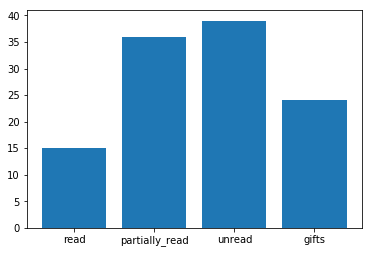

In [51]:
plt.bar(['read', 'partially_read', 'unread', 'gifts'], status_len)

In [177]:
# find percent of books read
len(read)/len(final_books_df[1:])
final_books_df['Item Total'].loc[final_books_df.Title == 'The Alchemist']

56     8.46
90    14.40
Name: Item Total, dtype: float64

In [181]:
# calculate spend for each category
total_status = final_books_df.groupby('Status')['Item Total'].sum()
total_status

Status
G    325.85
P    447.06
R    216.24
U    494.95
Name: Item Total, dtype: float64

<BarContainer object of 4 artists>

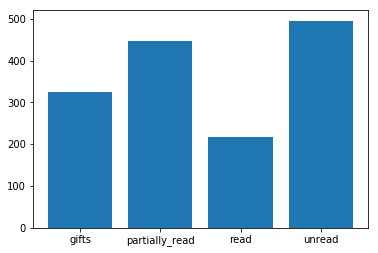

In [182]:
plt.bar(['gifts', 'partially_read', 'read', 'unread'], total_status)

## Obtain Books & Books data

In [55]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import time

In [157]:
response = requests.get('https://shop.booksandbooks.com/search/site/')
soup = BeautifulSoup(response.content, 'html.parser')

In [160]:
sa = soup.find('li')

In [161]:
sa

<li class="first leaf menu-depth-1 menu-item-1295"><a href="https://booksandbooks.com/" title="">Home</a></li>

In [154]:
soup.findAll('a')


[<a class="element-invisible element-focusable" href="#main-content">Skip to main content</a>,
 <a href="https://booksandbooks.com/" title="">Home</a>,
 <a href="/browse/book" title="">Browse Books</a>,
 <a href="https://booksandbooks.com/events/" title="">Events</a>,
 <a href="https://booksandbooks.com/stores-and-cafes/" title="">Stores</a>,
 <a href="/user?destination=search/site/walkaway%25cory" title="">My Account</a>,
 <a href="/cart/checkout" title="">Checkout</a>,
 <a href="/" title="Home page"><img alt="Books &amp;amp; Books" class="site-logo image-style-none" src="https://shop.booksandbooks.com/sites/shop.booksandbooks.com/files/bnb-logo_1.png"/></a>,
 <a href="/" title="Home page">Books &amp; Books</a>,
 <a class="fb" href="https://www.facebook.com/BooksandBooks/" rel="me" target="_blank"><i class="fa fa-facebook"></i></a>,
 <a class="twitter" href="https://twitter.com/BooksandBooks" rel="me" target="_blank"><i class="fa fa-twitter"></i></a>,
 <a class="youtube" href="https:/

In [151]:
# link_list = [a['href'] for a in soup.find_all('a', href=True)]

[a['href'] for a in soup.find_all('a', href=True)]

['#main-content',
 'https://booksandbooks.com/',
 '/browse/book',
 'https://booksandbooks.com/events/',
 'https://booksandbooks.com/stores-and-cafes/',
 '/user?destination=search/site/walkaway%25cory',
 '/cart/checkout',
 '/',
 '/',
 'https://www.facebook.com/BooksandBooks/',
 'https://twitter.com/BooksandBooks',
 'https://www.youtube.com/channel/UCXK1PkWeiFdJcbwQq-ityQw',
 'https://www.instagram.com/booksandbooks/',
 '/search',
 '/search/site',
 '/book/9780765392770',
 '/book/9780765392770',
 '/search/author/%22Doctorow%2C%20Cory%22',
 '/book/9780765392763',
 '/book/9780765392763',
 '/search/author/%22Doctorow%2C%20Cory%22',
 '/book/9781538424254',
 '/book/9781538424254',
 '/search/author/%22Doctorow%2C%20Cory%22',
 '/book/9781538424247',
 '/book/9781538424247',
 '/search/author/%22Doctorow%2C%20Cory%22',
 '/book/9781538424230',
 '/book/9781538424230',
 '/search/author/%22Doctorow%2C%20Cory%22',
 '/search/author/%22Benson%2C%20Amber%22',
 '/search/author/%22de%20Cuir%2C%20Gabrielle%22